# mp3564


uni # TODO: Replace this with your UNI

# MNIST Sign Language

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics         import accuracy_score
from sklearn.model_selection import train_test_split

import keras 
from keras import optimizers 
from keras import utils 
from keras.utils  import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation
from keras import losses 
from keras.optimizers import SGD 
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [2]:
#%%
class SignLanguage:
    def __init__(self):
        self.model = None
        
        self.data = {
            "train": None,
            "test" : None
        }
        self.create_model()
    
    def create_model(self):
        """
        Create a CNN model and save it to self.model
        """
        
        # TODO: Create a Sequential model
        self.model = Sequential()
        input_shape = (28, 28, 1)
        global num_classes 
        
        # taken from Keras sequential model example 
        self.model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
        
        self.model.add(MaxPooling2D(pool_size=(2, 2)))
        self.model.add(BatchNormalization())
        
        self.model.add(Conv2D(64, (3, 3), activation='relu'))
        self.model.add(MaxPooling2D(pool_size=(2, 2)))
        self.model.add(BatchNormalization())
        
        # Pass to Dense Layer 
        self.model.add(Flatten())
        self.model.add(Dense(128, activation='relu'))
        self.model.add(Dropout(0.25))
        self.model.add(BatchNormalization())

        self.model.add(Dropout(0.5))
        self.model.add(Dense(num_classes, activation='softmax'))

        
        self.model.compile(optimizer='adam', loss='categorical_crossentropy', 
                    metrics=['accuracy'])
        

    
    def prepare_data(self, images, labels):
        """
        Use this method to normalize the dataset and split it into train/test.
        Save your data in self.data["train"] and self.data["test"] as a tuple
        of (images, labels)
        
        :param images numpy array of size (num_examples, 28*28)
        :param labels numpy array of size (num_examples, )
        """


        # TODO : split into training and validation set 
        # Each row is an image and its label 
        # data["train"] and data["test"] are the cross-validation splits 
        # training data should be 0.2 
      
        x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)
        
        # TODO : reshape each example into a 2D image (28, 28, 1)
        #print("reshaped")
        global num_classes
        # reshape images 
        x_train = x_train.reshape((x_train.shape[0], 28, 28,1)) 
        x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
         
        # reshape labels 
        y_train = utils.to_categorical(y_train, num_classes)
        y_test = utils.to_categorical(y_test, num_classes)

        #print(x_train.shape)
        #print(x_test.shape)
        #print(y_train.shape)
        #print(y_test.shape)
        
        self.data = {
            "train": (x_train, y_train), #None, #(x_train, y_train)
            "test": (x_test, y_test)#None #(x_test, y_test)
        }

    # Four main operations in ConvNet
    # Convolution, Non Linearity, Pooling or Sub Sampling, Classification (Fully Connected Layer)
    def train(self, batch_size:int=128, epochs:int=1, verbose:int=1):
        """
        Use model.fit() to train your model. Make sure to return the history for a neat visualization.
        
        :param batch_size The batch size to use for training
        :param epochs     Number of epochs to use for training
        :param verbose    Whether or not to print training output
        """
        x_train, y_train = self.data['train']
        x_test, y_test = self.data['test']
        
        history = self.model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
        verbose=verbose, validation_data=(x_test, y_test))
        #callbacks=history 
        return history
    
    # takes in images for test data (test_images) -> x_test
    def predict(self, data):
        """
        Use the trained model to predict labels for test data.
        
        :param data: numpy array of test images    
        :return a numpy array of test labels. array size = (num_examples, )
        """
        data = data.reshape((data.shape[0], 28, 28,1)) 
        self.model.predict(data)
        np.argmax(self.model.predict(data), axis=1)
        # Don't forget to normalize the data in the same way as training data
        # self.model.predict() and np.argmax( , axis=1) might help
        
        return np.argmax(self.model.predict(data), axis=1)
    
    def visualize_data(self, data):
        """
        Visualizing the hand gestures
        
        :param data: numpy array of images
        """
        if data is None: return
        
        nrows, ncols = 5, 5
        fig, axs = plt.subplots(nrows, ncols, figsize=(10, 10), sharex=True, sharey=True)
        plt.subplots_adjust(wspace=0, hspace=0)

        for i in range(nrows):
            for j in range(ncols):
                axs[i][j].imshow(data[0][i*ncols+j].reshape(28, 28), cmap='gray')
        plt.show()

    def visualize_accuracy(self, history):
        """
        Plots out the accuracy measures given a keras history object
        
        :param history: return value from model.fit()
        """
        if history is None: return
        
        plt.plot(history.history['acc'])
        plt.plot(history.history['val_acc'])
        plt.title("Accuracy")
        plt.xlabel('epoch')
        plt.ylabel('accuracy')
        plt.legend(['train','test'])
        plt.show()

In [3]:
if __name__=="__main__":
    train = pd.read_csv('train.csv')
    test  = pd.read_csv('test.csv')

    train_labels, test_labels = train['label'].values, test['label'].values
    train.drop('label', axis=1, inplace=True)
    test.drop('label', axis=1, inplace=True)

    num_classes = test_labels.max() + 1
    train_images, test_images = train.values, test.values

    print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(27455, 784) (27455,) (7172, 784) (7172,)


In [4]:
if __name__=="__main__":
    my_model = SignLanguage()
    my_model.prepare_data(train_images, train_labels)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


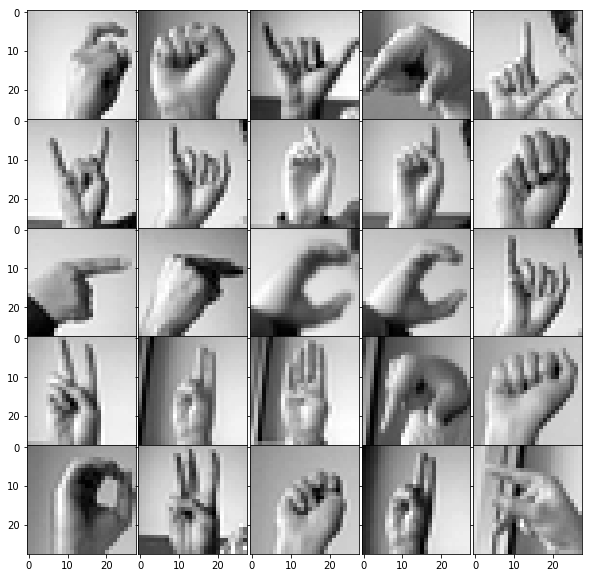

In [5]:
if __name__=="__main__":
    my_model.visualize_data(my_model.data["train"])

Instructions for updating:
Use tf.cast instead.
Train on 21964 samples, validate on 5491 samples
Epoch 1/30
21964/21964 [==============================] - 11s 513us/step - loss: 1.0770 - acc: 0.7084 - val_loss: 0.1518 - val_acc: 0.9871
Epoch 2/30
21964/21964 [==============================] - 11s 487us/step - loss: 0.1846 - acc: 0.9663 - val_loss: 0.0182 - val_acc: 1.0000
Epoch 3/30
21964/21964 [==============================] - 11s 489us/step - loss: 0.0747 - acc: 0.9907 - val_loss: 0.0101 - val_acc: 0.9996
Epoch 4/30
21964/21964 [==============================] - 10s 476us/step - loss: 0.0440 - acc: 0.9944 - val_loss: 0.0032 - val_acc: 1.0000
Epoch 5/30
21964/21964 [==============================] - 11s 485us/step - loss: 0.0290 - acc: 0.9970 - val_loss: 0.0023 - val_acc: 0.9998
Epoch 6/30
21964/21964 [==============================] - 11s 480us/step - loss: 0.0214 - acc: 0.9980 - val_loss: 0.0027 - val_acc: 1.0000
Epoch 7/30
21964/21964 [==============================] - 10s 474us/s

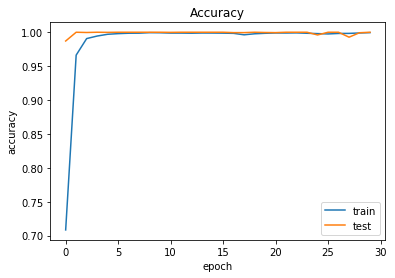

In [6]:
if __name__=="__main__":
    history = my_model.train(epochs=30, verbose=1)
    my_model.visualize_accuracy(history)

In [7]:
if __name__=="__main__":
    y_pred = my_model.predict(test_images)
    accuracy = accuracy_score(test_labels, y_pred)
    print(accuracy)

0.9479921918572225
